# Word2Vec with KMeans

In [13]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import plotly.express as px

# Load your dataset
file_path = 'test.tsv'  # Replace with your file path
data = pd.read_csv(file_path, sep='\t')

# Handle NaN values in accent_name
data['accent_name'] = data['accent_name'].fillna('')
pd.set_option('display.max_rows', None)

In [14]:
en_data = data[data['language_code']=="en"]

In [15]:
filtered_en_data = en_data[~en_data['accent_name'].str.contains(' ')]

filtered_en_data

,language_code,accent_name,hased_client_id
27,en,fluent,3c54c69382b6561dd742834ad99d9846c602ba00ec119b...
28,en,European,3c54c69382b6561dd742834ad99d9846c602ba00ec119b...
30,en,ESL,3c54c69382b6561dd742834ad99d9846c602ba00ec119b...
35,en,German,9811d602919ec7603386aa4b2eb4a1a41cd8bc4a912cad...
39,en,Dutch,2ae8b2f84ba05f38dcb91b8734934d920f21418abfd090...
...,...,...,...
2954,en,Mancunian,330d5b681ea0225170f269bfe84df97a04dfffc49e683c...
3004,en,Brooklyn,2f214bb2fa99b6591dc2fa943b58d5b015363dd25448ea...
3050,en,Thailand,192f839a0e9559dd2b505b5f86c0e058520a48656f1d47...
3096,en,Bangla,462cddbea3a9bccddc4b705905ec31ca536462611d320e...


In [16]:
# Tokenize the text data (split into words)
tokenized_text = [text.split() for text in data['accent_name']]

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Function to create an embedding for each accent_name
def get_embedding(text):
    words = text.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

# Generating embeddings for accent_name
en_embeddings = np.array([get_embedding(text) for text in filtered_en_data['accent_name']])


c:\Users\saima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



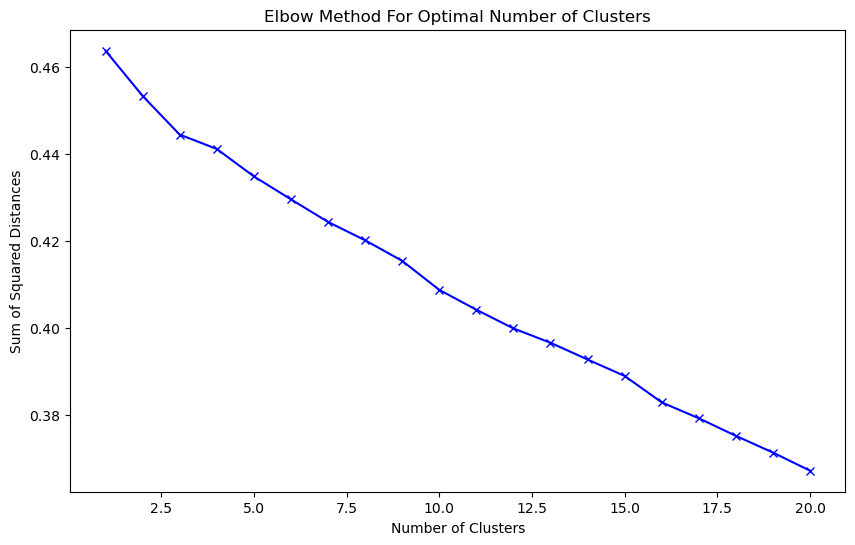

In [18]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

range_clusters = range(1, 21)

# Calculate the sum of squared distances for each number of clusters
sum_of_squared_distances = []
for k in range_clusters:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(en_embeddings)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [17]:
# K-Means clustering
num_clusters = 4  # Arbitrary, can be tuned
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(en_embeddings)

# Add cluster labels to the dataset
filtered_en_data['cluster'] = kmeans.labels_

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(en_embeddings)

# Add PCA components to the dataset
filtered_en_data['pca_one'] = reduced_embeddings[:, 0]
filtered_en_data['pca_two'] = reduced_embeddings[:, 1]

# Create a scatter plot with Plotly
fig = px.scatter(filtered_en_data, x='pca_one', y='pca_two', color='cluster',
                 hover_data=['language_code'], color_continuous_scale='Viridis')
fig.update_layout(title='Word2Vec with K-Means Clusters for en', xaxis_title='PCA 1', yaxis_title='PCA 2', legend_title='Cluster')
fig.show()


C:\Users\saima\AppData\Local\Temp\ipykernel_20128\1413391253.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\1413391253.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\1413391253.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [20]:
# Grouping by cluster and counting the frequency of each language code
cluster_language_count = filtered_en_data.groupby('cluster')['accent_name'].value_counts()

# # Filtering to show only language codes with frequency greater than zero
# cluster_language_count = cluster_language_count[cluster_language_count > 0]


print(cluster_language_count)



cluster  accent_name                  
0        6627018149                       1
         A'lo                             1
         Adjustable                       1
         Average                          1
         Chinese                          1
         Clear                            1
         Colombia                         1
         Conversational                   1
         ESL                              1
         Edinburgh                        1
         Foreign                          1
         France                           1
         French                           1
         Indonesian                       1
         Midatlantic                      1
         Okie                             1
         Slavic                           1
         Spanish                          1
         Swenglish                        1
         intermediate                     1
         latin                            1
         london                      

In [9]:
from gensim.models import KeyedVectors

# Load the Google News Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format('archive/GoogleNews-vectors-negative300.bin', binary=True)
import numpy as np

# Function to get embedding for a word
def get_embedding(word):
    try:
        return word2vec_model[word]
    except KeyError:
        # Return a zero vector if the word is not in the vocabulary
        return np.zeros(word2vec_model.vector_size)

# Apply the function to your DataFrame
# Generating embeddings for accent_name
en_goo_embeddings = np.array([get_embedding(text) for text in filtered_en_data['accent_name']])
from sklearn.cluster import KMeans

# Choose the number of clusters
k = 5 # Adjust this based on your requirement

# Fit K-means to the embeddings
kmeans = KMeans(n_clusters=k)
filtered_en_data['cluster'] = kmeans.fit_predict(en_goo_embeddings)


C:\Users\saima\AppData\Local\Temp\ipykernel_7376\1919802015.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_en_data['cluster'] = kmeans.fit_predict(en_goo_embeddings)


In [12]:
# Add cluster labels to the dataset
filtered_en_data['cluster'] = kmeans.labels_

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(en_goo_embeddings)

# Add PCA components to the dataset
filtered_en_data['pca_one'] = reduced_embeddings[:, 0]
filtered_en_data['pca_two'] = reduced_embeddings[:, 1]

# Create a scatter plot with Plotly
fig = px.scatter(filtered_en_data, x='pca_one', y='pca_two', color='cluster',
                 hover_data=['language_code'], color_continuous_scale='Viridis')
fig.update_layout(title='Word2Vec with K-Means Clusters in 2D PCA Space', xaxis_title='PCA 1', yaxis_title='PCA 2', legend_title='Cluster')
fig.show()

C:\Users\saima\AppData\Local\Temp\ipykernel_7376\3587152748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_en_data['cluster'] = kmeans.labels_
C:\Users\saima\AppData\Local\Temp\ipykernel_7376\3587152748.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_en_data['pca_one'] = reduced_embeddings[:, 0]
C:\Users\saima\AppData\Local\Temp\ipykernel_7376\3587152748.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [15]:
filtered_en_data.head()

,language_code,accent_name,hased_client_id,embedding,cluster,pca_one,pca_two
27,en,fluent,3c54c69382b6561dd742834ad99d9846c602ba00ec119b...,"[0.012512207, -0.04736328, -0.13574219, -0.015...",0,-0.240478,0.809419
28,en,European,3c54c69382b6561dd742834ad99d9846c602ba00ec119b...,"[0.0859375, -0.020263672, 0.27929688, 0.133789...",1,0.832605,-0.631931
30,en,ESL,3c54c69382b6561dd742834ad99d9846c602ba00ec119b...,"[-0.21484375, -0.43164062, 0.009765625, -0.021...",0,-0.557079,0.139652
35,en,German,9811d602919ec7603386aa4b2eb4a1a41cd8bc4a912cad...,"[0.30664062, 0.11035156, 0.16699219, 0.0132446...",2,1.280763,-0.443020
39,en,Dutch,2ae8b2f84ba05f38dcb91b8734934d920f21418abfd090...,"[-0.096191406, -0.10253906, 0.076660156, 0.018...",1,1.240304,-0.122654


In [16]:
# Grouping by cluster and counting the frequency of each language code
cluster_language_count = filtered_en_data.groupby('cluster')['accent_name'].value_counts()

# Filtering to show only language codes with frequency greater than zero
# cluster_language_count = cluster_language_count[cluster_language_count > 25]

print(cluster_language_count)



cluster  accent_name                  
0        6627018149                       1
         A'lo                             1
         A2                               1
         Adjustable                       1
         Arnold                           1
         Average                          1
         B2                               1
         Basic                            1
         Brooklyn                         1
         California                       1
         Car                              1
         Chicago                          1
         Chinglish                        1
         Clear                            1
         Conversational                   1
         Cool                             1
         Danglish                         1
         Demure                           1
         Deutsch                          1
         ESL                              1
         English                          1
         Expert                      

# MBERT Embeddings with K-Means

c:\Users\saima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



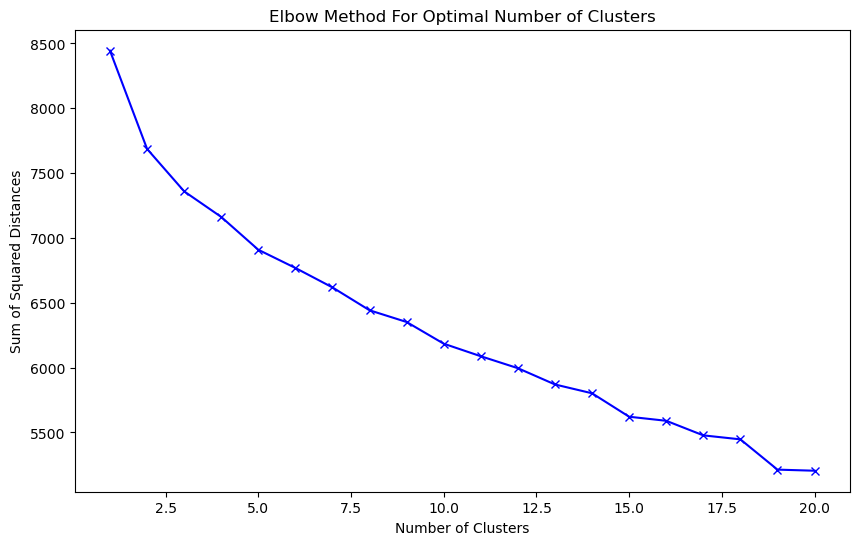

In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
import plotly.express as px

# Load M-BERT model and tokenizer
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Function to get embeddings from M-BERT
def get_mbert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Load your dataset
file_path = 'test.tsv'  # Replace with your file path
data = pd.read_csv(file_path, sep='\t')


en_data = data[data['language_code']=="en"]

filtered_en_data = en_data[~en_data['accent_name'].str.contains(' ')]



# Generating embeddings for accent_name
mbert_embeddings = np.vstack(filtered_en_data['accent_name'].apply(get_mbert_embeddings))

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the range of potential clusters you want to test
# For example, testing from 1 to 20 clusters
range_clusters = range(1, 21)

# Calculate the sum of squared distances for each number of clusters
sum_of_squared_distances = []
for k in range_clusters:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(mbert_embeddings)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [34]:
# K-Means clustering
num_clusters = 5  # This is an arbitrary choice, can be tuned
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(mbert_embeddings)

# Adding cluster labels to the original dataset
filtered_en_data['cluster'] = kmeans.labels_

# Applying PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(mbert_embeddings)

# Add PCA components to the original dataset
filtered_en_data['pca_one'] = reduced_features[:, 0]
filtered_en_data['pca_two'] = reduced_features[:, 1]

# Creating a scatter plot with Plotly using the 'viridis' color scale
fig = px.scatter(filtered_en_data, x='pca_one', y='pca_two', color='cluster',
                 hover_data=['language_code'], color_continuous_scale='Viridis')
fig.update_layout(title='M-BERT with K-Means Clustering for en',
                  xaxis_title='PCA 1', 
                  yaxis_title='PCA 2', 
                  legend_title='Cluster')
fig.show()


C:\Users\saima\AppData\Local\Temp\ipykernel_20128\2265732694.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\2265732694.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\2265732694.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [35]:
# Grouping by cluster and counting the frequency of each language code
cluster_language_count = filtered_en_data.groupby('cluster')['accent_name'].value_counts()

# Filtering to show only language codes with frequency greater than zero
# cluster_language_count = cluster_language_count[cluster_language_count > 25]

print(cluster_language_count)



cluster  accent_name                  
0        Arnold                           1
         Bangla                           1
         Chinglish                        1
         Clear                            1
         Danglish                         1
         Demure                           1
         Globish                          1
         Good                             1
         Low                              1
         Mancunian                        1
         Okay                             1
         Okie                             1
         Patois                           1
         Spanglish                        1
         Swenglish                        1
1        Brooklyn                         1
         California                       1
         Chicago                          1
         Edinburgh                        1
         Manchester                       1
         Maryland                         1
         Massachusetts               

# TF-IDF with K-Means

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
import plotly.express as px

# Load your dataset
file_path = 'test.tsv'  # Replace with your file path
data = pd.read_csv(file_path, sep='\t')


en_data = data[data['language_code']=="en"]

filtered_en_data = en_data[~en_data['accent_name'].str.contains(' ')]

# TF-IDF Vectorization for accent_name
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_en_data['accent_name'])

# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Determine the range of potential clusters you want to test
# # For example, testing from 1 to 20 clusters
# range_clusters = range(1, 21)

# # Calculate the sum of squared distances for each number of clusters
# sum_of_squared_distances = []
# for k in range_clusters:
#     km = KMeans(n_clusters=k, random_state=0)
#     km = km.fit(tfidf_matrix)
#     sum_of_squared_distances.append(km.inertia_)

# # Plot the Elbow graph
# plt.figure(figsize=(10, 6))
# plt.plot(range_clusters, sum_of_squared_distances, 'bx-')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Sum of Squared Distances')
# plt.title('Elbow Method For Optimal Number of Clusters')
# plt.show()


In [9]:
# # Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Applying K-Means clustering
num_clusters = 5  # This is an arbitrary choice, can be tuned
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf_matrix)

# Add cluster labels and PCA components to the original dataset
filtered_en_data['cluster'] = kmeans.labels_
filtered_en_data['pca_one'] = reduced_features[:, 0]
filtered_en_data['pca_two'] = reduced_features[:, 1]

# Creating a scatter plot with Plotly
fig = px.scatter(filtered_en_data, x='pca_one', y='pca_two', color='cluster', hover_data=['language_code'],color_continuous_scale='Viridis')
fig.update_layout(title='TF-IDF with K-means Clustering for "en" ', xaxis_title='PCA 1', yaxis_title='PCA 2', legend_title='Cluster')
fig.show()

C:\Users\saima\AppData\Local\Temp\ipykernel_6680\2492666953.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_en_data['cluster'] = kmeans.labels_
C:\Users\saima\AppData\Local\Temp\ipykernel_6680\2492666953.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_en_data['pca_one'] = reduced_features[:, 0]
C:\Users\saima\AppData\Local\Temp\ipykernel_6680\2492666953.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [10]:
# Grouping by cluster and counting the frequency of each language code
cluster_language_count = filtered_en_data.groupby('cluster')['accent_name'].value_counts()

# Filtering to show only language codes with frequency greater than zero
# cluster_language_count = cluster_language_count[cluster_language_count > 25]

print(cluster_language_count)



cluster  accent_name                  
0        Slavic                           1
1        6627018149                       1
         A'lo                             1
         A2                               1
         Adjustable                       1
         Arnold                           1
         Asian                            1
         Austrian                         1
         Average                          1
         B2                               1
         Bangla                           1
         Bangladeshi                      1
         Basic                            1
         Brazilian                        1
         British                          1
         Brooklyn                         1
         Bulgarian                        1
         California                       1
         Car                              1
         Catalan                          1
         Catalunya                        1
         Chicago                     

In [ ]:
en,bn,ca

Word2Vec with KMeans for bn

In [18]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import plotly.express as px

# Load your dataset
file_path = 'test.tsv'  # Replace with your file path
data = pd.read_csv(file_path, sep='\t')

# Handle NaN values in accent_name
data['accent_name'] = data['accent_name'].fillna('')

In [19]:
# cluster_language_count = data.groupby('language_code')['language_code'].value_counts()
cluster_language_count = data.groupby('language_code').size().sort_values(ascending=False)


cluster_language_count

language_code
en     440
bn     375
ca     305
es     135
pt     117
      ... 
so       1
lo       1
mni      1
mos      1
ace      1
Length: 113, dtype: int64

In [6]:
len(cluster_language_count)

113

In [20]:
bn_data = data[data['language_code']=="bn"]
filtered_bn_data = bn_data[~bn_data['accent_name'].str.contains(' ')]

filtered_bn_data

,language_code,accent_name,hased_client_id
46,bn,Native,f70c6583c82c9d54019c013ec6530aa12dbf8785ca9d6d...
57,bn,Kolkata,741cc95312beeab5db99f4eed70140a9564d75b6537057...
379,bn,Indian,8eb19135e33369181bd0cf29bf9010a78c8d8adf5dc20b...
556,bn,বাংলাদেশি,af7bf57e793f2edfd04728b59c1d6d8f26bdccbb8c112f...
780,bn,রাঢ়ী,57bbd2697eca8552fdf3bbdc488cac4c2d366be5099994...
...,...,...,...
3117,bn,Shuddho,5f24e6cbe164fdce92295beb7f4c215b9e6fadcf23dbf7...
3145,bn,মোবাইলে,cc38afb17ffacc4716670cf742bb747c0d817539d2705e...
3154,bn,চিটাইংগা,616500d4e1eb80af8654a80aee001ca95aaa932d3b26e6...
3155,bn,চাঁটগা,616500d4e1eb80af8654a80aee001ca95aaa932d3b26e6...


In [21]:
from gensim.models import KeyedVectors

# Load the Google News Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format('archive/GoogleNews-vectors-negative300.bin', binary=True)
import numpy as np

# Function to get embedding for a word
def get_embedding(word):
    try:
        return word2vec_model[word]
    except KeyError:
        # Return a zero vector if the word is not in the vocabulary
        return np.zeros(word2vec_model.vector_size)

# Apply the function to your DataFrame
# Generating embeddings for accent_name
bn_goo_embeddings = np.array([get_embedding(text) for text in filtered_bn_data['accent_name']])
from sklearn.cluster import KMeans

# Choose the number of clusters
k = 5 # Adjust this based on your requirement

# Fit K-means to the embeddings
kmeans = KMeans(n_clusters=k)
filtered_bn_data['cluster'] = kmeans.fit_predict(bn_goo_embeddings)


C:\Users\saima\AppData\Local\Temp\ipykernel_20128\1943659978.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
# Add cluster labels to the dataset
filtered_bn_data['cluster'] = kmeans.labels_

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(bn_goo_embeddings)

# Add PCA components to the dataset
filtered_bn_data['pca_one'] = reduced_embeddings[:, 0]
filtered_bn_data['pca_two'] = reduced_embeddings[:, 1]

# Create a scatter plot with Plotly
fig = px.scatter(filtered_bn_data, x='pca_one', y='pca_two', color='cluster',
                 hover_data=['language_code'], color_continuous_scale='Viridis')
fig.update_layout(title='Word2Vec with K-Means Clusters for bn', xaxis_title='PCA 1', yaxis_title='PCA 2', legend_title='Cluster')
fig.show()

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\1739639461.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\saima\AppData\Local\Temp\ipykernel_20128\1739639461.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\1739639461.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
# Grouping by cluster and counting the frequency of each language code
cluster_language_count = filtered_bn_data.groupby('cluster')['accent_name'].value_counts()

# Filtering to show only language codes with frequency greater than zero
# cluster_language_count = cluster_language_count[cluster_language_count > 25]

print(cluster_language_count)



cluster  accent_name                       
0        Unclear                               1
1        Native                                2
         Adult                                 1
         Authentic                             1
         Average                               1
         Boy                                   1
         Casual                                1
         Clean                                 1
         Clear                                 1
         Common                                1
         Contributor                           1
         Correct                               1
         Decent                                1
         Flat                                  1
         Generic                               1
         Good                                  1
         Indian                                1
         Local                                 1
         Male                                  1
         Mixed           

In [31]:
from gensim.models import KeyedVectors

from bnlp import BengaliWord2Vec

bwv = BengaliWord2Vec()
model_path = "bengali_word2vec.model"
# Load the Google News Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format('archive/GoogleNews-vectors-negative300.bin', binary=True)
# import numpy as np

# # Function to get embedding for a word
# def get_embedding(word):
#     try:
#         return bwv.get_word_vector( word)
#     except KeyError:
#         # Return a zero vector if the word is not in the vocabulary
#         try:
#             return word2vec_model[word]
#         except KeyError:
#             return np.zeros(word2vec_model.vector_size)

# # Apply the function to your DataFrame
# # Generating embeddings for accent_name
# bn_goo_embeddings = np.array([get_embedding(text) for text in filtered_bn_data['accent_name']])

import numpy as np

# Assuming both models have the same vector size, if not, you need to handle this
word = 'গ্রাম'
vector = bwv.get_word_vector(word)
vector_size = vector.shape  # Replace with actual vector size of BengaliWord2Vec

def get_embedding(word):
    try:
        return bwv.get_word_vector(word)
    except KeyError:
        # Return a zero vector if the word is not in the Bengali vocabulary
        try:
            return word2vec_model[word]
        except KeyError:
            return np.zeros(vector_size)

# Generate embeddings and ensure they all have the same size
embeddings = []
for text in filtered_bn_data['accent_name']:
    emb = get_embedding(text)
    if len(emb) == vector_size:
        embeddings.append(emb)
    else:
        # Handle the case where the embedding size is different
        # For example, you can append a zero vector or handle it as you see fit
        embeddings.append(np.zeros(vector_size))

bn_goo_embeddings = np.array(embeddings)

# Rest of your clustering code...


from sklearn.cluster import KMeans

# Choose the number of clusters
k = 5 # Adjust this based on your requirement

# Fit K-means to the embeddings
kmeans = KMeans(n_clusters=k)
filtered_bn_data['cluster'] = kmeans.fit_predict(bn_goo_embeddings)


In [32]:
# Add cluster labels to the dataset
filtered_bn_data['cluster'] = kmeans.labels_

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(bn_goo_embeddings)

# Add PCA components to the dataset
filtered_bn_data['pca_one'] = reduced_embeddings[:, 0]
filtered_bn_data['pca_two'] = reduced_embeddings[:, 1]

# Create a scatter plot with Plotly
fig = px.scatter(filtered_bn_data, x='pca_one', y='pca_two', color='cluster',
                 hover_data=['language_code'], color_continuous_scale='Viridis')
fig.update_layout(title='Word2Vec with K-Means Clusters in 2D PCA Space', xaxis_title='PCA 1', yaxis_title='PCA 2', legend_title='Cluster')
fig.show()

In [33]:
# Grouping by cluster and counting the frequency of each language code
cluster_language_count = filtered_bn_data.groupby('cluster')['accent_name'].value_counts()

# Filtering to show only language codes with frequency greater than zero
# cluster_language_count = cluster_language_count[cluster_language_count > 25]

print(cluster_language_count)



cluster  accent_name                       
0        Native                                2
         প্রমিত                                2
         ????                                  1
         A                                     1
         Adult                                 1
         Amar                                  1
         Authentic                             1
         Average                               1
         B                                     1
         Bangadeshi                            1
         Bangla                                1
         Bangla(Bangladesh)                    1
         Bangladesh                            1
         Bangladeshi                           1
         Barishal                              1
         Bengali                               1
         Bhola                                 1
         Boy                                   1
         C                                     1
         Casual          

# MBERT Embeddings with K-Means for "BN"

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
import plotly.express as px

# Load M-BERT model and tokenizer
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Function to get embeddings from M-BERT
def get_mbert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Load your dataset
file_path = 'test.tsv'  # Replace with your file path
data = pd.read_csv(file_path, sep='\t')


bn_data = data[data['language_code']=="bn"]

filtered_bn_data = bn_data[~bn_data['accent_name'].str.contains(' ')]



# Generating embeddings for accent_name
mbert_embeddings = np.vstack(filtered_bn_data['accent_name'].apply(get_mbert_embeddings))

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the range of potential clusters you want to test
# For example, testing from 1 to 20 clusters
range_clusters = range(1, 21)

# Calculate the sum of squared distances for each number of clusters
sum_of_squared_distances = []
for k in range_clusters:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(mbert_embeddings)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [12]:
# K-Means clustering
num_clusters = 4  # This is an arbitrary choice, can be tuned
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(mbert_embeddings)

# Adding cluster labels to the original dataset
filtered_bn_data['cluster'] = kmeans.labels_

# Applying PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(mbert_embeddings)

# Add PCA components to the original dataset
filtered_bn_data['pca_one'] = reduced_features[:, 0]
filtered_bn_data['pca_two'] = reduced_features[:, 1]

# Creating a scatter plot with Plotly using the 'viridis' color scale
fig = px.scatter(filtered_bn_data, x='pca_one', y='pca_two', color='cluster',
                 hover_data=['language_code'], color_continuous_scale='Viridis')
fig.update_layout(title='M-BERT with K-Means Clustering for bn',
                  xaxis_title='PCA 1', 
                  yaxis_title='PCA 2', 
                  legend_title='Cluster')
fig.show()


C:\Users\saima\AppData\Local\Temp\ipykernel_20128\3186051151.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\3186051151.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\3186051151.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [11]:
# Grouping by cluster and counting the frequency of each language code
cluster_language_count = filtered_bn_data.groupby('cluster')['accent_name'].value_counts()

# Filtering to show only language codes with frequency greater than zero
# cluster_language_count = cluster_language_count[cluster_language_count > 25]

print(cluster_language_count)



cluster  accent_name                       
0        Amar                                  1
         Bangadeshi                            1
         Bangla                                1
         Barishal                              1
         Bhola                                 1
         Casual                                1
         Chandpur                              1
         Chatgaiya                             1
         Chittagonian                          1
         Comilla                               1
         Cumilla                               1
         Dhakaiya                              1
         Gazipur                               1
         India-Bangla                          1
         Kushtian                              1
         Mymensingh                            1
         Narayanganj                           1
         Narayanganj-jossoreian                1
         Netrokona                             1
         Noakhali        

# TF-IDF with K-Means for language "bn"

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
import plotly.express as px

# Load your dataset
file_path = 'test.tsv'  # Replace with your file path
data = pd.read_csv(file_path, sep='\t')


bn_data = data[data['language_code']=="bn"]

filtered_bn_data = bn_data[~bn_data['accent_name'].str.contains(' ')]

# TF-IDF Vectorization for accent_name
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_bn_data['accent_name'])

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the range of potential clusters you want to test
# For example, testing from 1 to 20 clusters
range_clusters = range(1, 21)

# Calculate the sum of squared distances for each number of clusters
sum_of_squared_distances = []
for k in range_clusters:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(tfidf_matrix)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [13]:
# # Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Applying K-Means clustering
num_clusters = 5  # This is an arbitrary choice, can be tuned
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf_matrix)

# Add cluster labels and PCA components to the original dataset
filtered_bn_data['cluster'] = kmeans.labels_
filtered_bn_data['pca_one'] = reduced_features[:, 0]
filtered_bn_data['pca_two'] = reduced_features[:, 1]

# Creating a scatter plot with Plotly
fig = px.scatter(filtered_bn_data, x='pca_one', y='pca_two', color='cluster', hover_data=['language_code'],color_continuous_scale='Viridis')
fig.update_layout(title='TF-IDF with K-means Clustering for bn', xaxis_title='PCA 1', yaxis_title='PCA 2', legend_title='Cluster')
fig.show()

C:\Users\saima\AppData\Local\Temp\ipykernel_6680\2747274554.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_6680\2747274554.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_6680\2747274554.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [18]:
# Grouping by cluster and counting the frequency of each language code
cluster_language_count = filtered_bn_data.groupby('cluster')['accent_name'].value_counts()

# Filtering to show only language codes with frequency greater than zero
# cluster_language_count = cluster_language_count[cluster_language_count > 25]

print(cluster_language_count)



cluster  accent_name                       
0        Native                                2
         ????                                  1
         A                                     1
         Adult                                 1
         Amar                                  1
         Authentic                             1
         Average                               1
         B                                     1
         Bangadeshi                            1
         Bangla                                1
         Bangla(Bangladesh)                    1
         Bangladesh                            1
         Bangladeshi                           1
         Barishal                              1
         Bengali                               1
         Bhola                                 1
         Boy                                   1
         C                                     1
         Casual                                1
         Chandpur        

Word2Vec with KMeans for ca

In [23]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import plotly.express as px

# Load your dataset
file_path = 'test.tsv'  # Replace with your file path
data = pd.read_csv(file_path, sep='\t')

# Handle NaN values in accent_name
data['accent_name'] = data['accent_name'].fillna('')

ca_data = data[data['language_code']=="ca"]
filtered_ca_data = ca_data[~ca_data['accent_name'].str.contains(' ')]

filtered_ca_data

,language_code,accent_name,hased_client_id
125,ca,Tortosí,03a25112340d2ceed48a42112ae77c5e926e6b4a2e8899...
192,ca,Girona,f43c821ca83214f7fce562c82f81ccd5045da89500f57d...
204,ca,Barcelonina,5ef899a098e505f29c3bfaf7da39f9448115106af87a59...
207,ca,mallorquí,f5a474442c3d3a277ca396136f0a542d18e760fadde9e9...
432,ca,standard,521a8a070d38f5c5e5ca1a07ef19d00496ff81a95db0f4...
...,...,...,...
2758,ca,Esporles,87088344b48541081487558178ada748d7dc22fee4cfbe...
2765,ca,Estranger,e7fe3ce6ecc77b25b961c0850de56a502103456cb3e4a6...
2774,ca,Petra,24b96ad13c3d01f3ad3333e3b2e984819f9179f78e625f...
2873,ca,Jove,3f69ec1594b949cc845d4af057d5c56a4812d6d616a8ea...


In [24]:
from gensim.models import KeyedVectors

# Load the Google News Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format('archive/GoogleNews-vectors-negative300.bin', binary=True)
import numpy as np

# Function to get embedding for a word
def get_embedding(word):
    try:
        return word2vec_model[word]
    except KeyError:
        # Return a zero vector if the word is not in the vocabulary
        return np.zeros(word2vec_model.vector_size)

# Apply the function to your DataFrame
# Generating embeddings for accent_name
ca_goo_embeddings = np.array([get_embedding(text) for text in filtered_ca_data['accent_name']])
from sklearn.cluster import KMeans

# Choose the number of clusters
k = 3# Adjust this based on your requirement

# Fit K-means to the embeddings
kmeans = KMeans(n_clusters=k)
filtered_ca_data['cluster'] = kmeans.fit_predict(ca_goo_embeddings)


C:\Users\saima\AppData\Local\Temp\ipykernel_20128\2858067515.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
# Add cluster labels to the dataset
filtered_ca_data['cluster'] = kmeans.labels_

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(ca_goo_embeddings)

# Add PCA components to the dataset
filtered_ca_data['pca_one'] = reduced_embeddings[:, 0]
filtered_ca_data['pca_two'] = reduced_embeddings[:, 1]

# Create a scatter plot with Plotly
fig = px.scatter(filtered_ca_data, x='pca_one', y='pca_two', color='cluster',
                 hover_data=['language_code'], color_continuous_scale='Viridis')
fig.update_layout(title='Word2Vec with K-Means Clusters for ca', xaxis_title='PCA 1', yaxis_title='PCA 2', legend_title='Cluster')
fig.show()

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\3870777709.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\3870777709.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\3870777709.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [43]:
# Grouping by cluster and counting the frequency of each language code
cluster_language_count = filtered_ca_data.groupby('cluster')['accent_name'].value_counts()

# Filtering to show only language codes with frequency greater than zero
# cluster_language_count = cluster_language_count[cluster_language_count > 25]

print(cluster_language_count)



cluster  accent_name      
0        Alcarrasì            1
         Alcarràs             1
         Ampostí              1
         Argentí              1
         Badaloní             1
         Barcelonina          1
         Barcelonès           1
         Barceloní            1
         Benifaió             1
         Berguedà             1
         Bo                   1
         Clar                 1
         Correcte             1
         D'Igualada           1
         D'Osona              1
         Deltaic              1
         Ebre                 1
         Ebrenc               1
         Empordanès           1
         Esporles             1
         Estranger            1
         Felanitx             1
         Flixanco             1
         Garraf               1
         Garrotxi             1
         Illes                1
         Industrial           1
         Lleidatà             1
         Maresme              1
         Maresmenc            1
         Maó 

# MBERT Embeddings with K-Means for "ca"

c:\Users\saima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



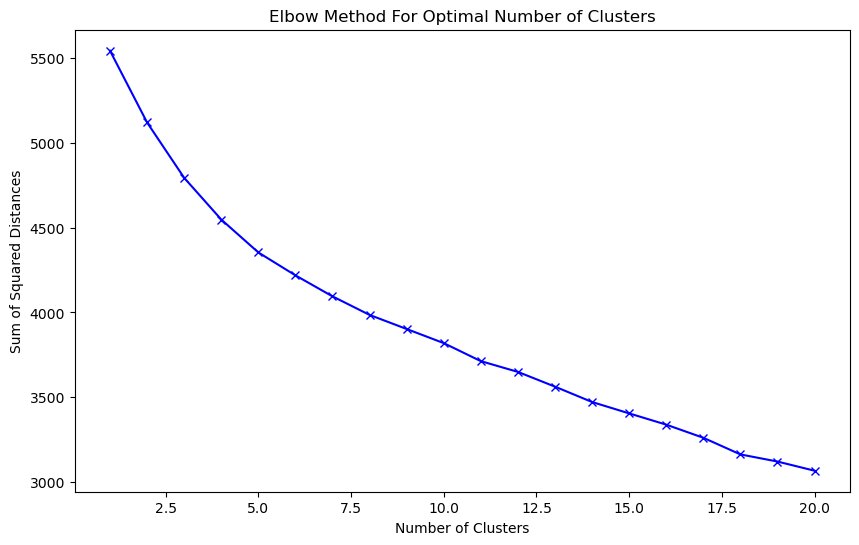

In [36]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
import plotly.express as px

# Load M-BERT model and tokenizer
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Function to get embeddings from M-BERT
def get_mbert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Load your dataset
file_path = 'test.tsv'  # Replace with your file path
data = pd.read_csv(file_path, sep='\t')


ca_data = data[data['language_code']=="ca"]

filtered_ca_data = ca_data[~ca_data['accent_name'].str.contains(' ')]



# Generating embeddings for accent_name
mbert_embeddings = np.vstack(filtered_ca_data['accent_name'].apply(get_mbert_embeddings))

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the range of potential clusters you want to test
# For example, testing from 1 to 20 clusters
range_clusters = range(1, 21)

# Calculate the sum of squared distances for each number of clusters
sum_of_squared_distances = []
for k in range_clusters:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(mbert_embeddings)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [9]:
# K-Means clustering
num_clusters = 4  # This is an arbitrary choice, can be tuned
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(mbert_embeddings)

# Adding cluster labels to the original dataset
filtered_ca_data['cluster'] = kmeans.labels_

# Applying PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(mbert_embeddings)

# Add PCA components to the original dataset
filtered_ca_data['pca_one'] = reduced_features[:, 0]
filtered_ca_data['pca_two'] = reduced_features[:, 1]

# Creating a scatter plot with Plotly using the 'viridis' color scale
fig = px.scatter(filtered_ca_data, x='pca_one', y='pca_two', color='cluster',
                 hover_data=['language_code'], color_continuous_scale='Viridis')
fig.update_layout(title='M-BERT with K-Means Clustering for ca',
                  xaxis_title='PCA 1', 
                  yaxis_title='PCA 2', 
                  legend_title='Cluster')
fig.show()


C:\Users\saima\AppData\Local\Temp\ipykernel_20128\762266668.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\762266668.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\762266668.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [48]:
# Grouping by cluster and counting the frequency of each language code
cluster_language_count = filtered_ca_data.groupby('cluster')['accent_name'].value_counts()

# Filtering to show only language codes with frequency greater than zero
# cluster_language_count = cluster_language_count[cluster_language_count > 25]

print(cluster_language_count)



cluster  accent_name      
0        Alcarrasì            1
         Alcarràs             1
         Ampostí              1
         Barcelonina          1
         Benifaió             1
         D'Igualada           1
         D'Osona              1
         Ebrenc               1
         Esporles             1
         Felanitx             1
         Flixanco             1
         Garraf               1
         Garrotxi             1
         Maresmenc            1
         Maó                  1
         Osonenc              1
         Pallarės             1
         Penedesenc           1
         Poble                1
         Rapitenc             1
         Reusenc              1
         Tarraconí            1
         Tortosí              1
         Vallesà              1
         Vigatà               1
         apitxat              1
         tarragoní            1
1        Andorra              1
         Barcelona            1
         Girona               1
         Ille

# TF-IDF with K-Means for ca

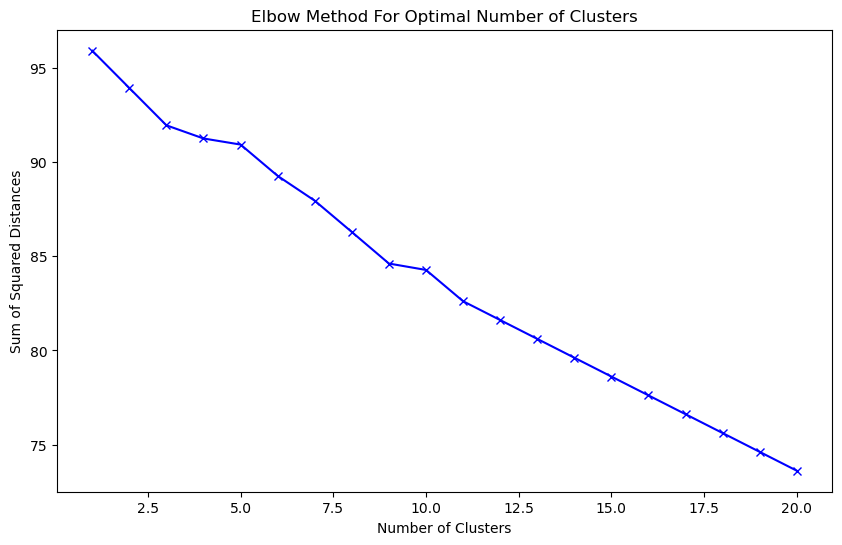

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
import plotly.express as px

# Load your dataset
file_path = 'test.tsv'  # Replace with your file path
data = pd.read_csv(file_path, sep='\t')


ca_data = data[data['language_code']=="ca"]

filtered_ca_data = ca_data[~ca_data['accent_name'].str.contains(' ')]

# TF-IDF Vectorization for accent_name
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_ca_data['accent_name'])

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the range of potential clusters you want to test
# For example, testing from 1 to 20 clusters
range_clusters = range(1, 21)

# Calculate the sum of squared distances for each number of clusters
sum_of_squared_distances = []
for k in range_clusters:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(tfidf_matrix)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [2]:
# # Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Applying K-Means clustering
num_clusters = 5  # This is an arbitrary choice, can be tuned
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf_matrix)

# Add cluster labels and PCA components to the original dataset
filtered_ca_data['cluster'] = kmeans.labels_
filtered_ca_data['pca_one'] = reduced_features[:, 0]
filtered_ca_data['pca_two'] = reduced_features[:, 1]

# Creating a scatter plot with Plotly
fig = px.scatter(filtered_ca_data, x='pca_one', y='pca_two', color='cluster', hover_data=['language_code'],color_continuous_scale='Viridis')
fig.update_layout(title='TF-IDF with K-means Clustering for ca', xaxis_title='PCA 1', yaxis_title='PCA 2', legend_title='Cluster')
fig.show()

C:\Users\saima\AppData\Local\Temp\ipykernel_20128\2476706601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ca_data['cluster'] = kmeans.labels_
C:\Users\saima\AppData\Local\Temp\ipykernel_20128\2476706601.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ca_data['pca_one'] = reduced_features[:, 0]
C:\Users\saima\AppData\Local\Temp\ipykernel_20128\2476706601.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [3]:
# Grouping by cluster and counting the frequency of each language code
cluster_language_count = filtered_ca_data.groupby('cluster')['accent_name'].value_counts()

# Filtering to show only language codes with frequency greater than zero
# cluster_language_count = cluster_language_count[cluster_language_count > 25]

print(cluster_language_count)



cluster  accent_name
0        Alcarrasì      1
         Alcarràs       1
         Ampostí        1
         Andorra        1
         Argentí        1
                       ..
1        Occidental.    1
         occidental     1
2        Correcte       1
3        Berguedà       1
4        Lleidatà       1
Name: accent_name, Length: 97, dtype: int64
